In [2]:
import pandas as pd

dfd=pd.read_csv("train_data_hr_anylytics.csv")
dfds=dfd.copy()


In [3]:
for column in df.columns:
    print(f"Value counts for {column}:\n{df[column].value_counts()}\n")


NameError: name 'df' is not defined

In [4]:
print(df.isnull().sum())

NameError: name 'df' is not defined

In [5]:
def missing_imputa(data: pd.DataFrame) -> pd.DataFrame:
    data['education'].fillna('unknown',inplace=True)
    data['previous_year_rating'].fillna(0,inplace=True)
    return data
dfds = missing_imputa(dfds)


In [6]:
# Feature Engineering

# Create a new feature: Fresher or Experienced based on Previous Year Rating
#dfds['fresher_or_experienced'] = dfds['previous_year_rating'].apply(lambda x: 'Fresher' if x == 0.0 else 'Experienced')

# Feature: Age at Joining
def feature_eng(data:pd.DataFrame) -> pd.DataFrame:
    data['age_at_joining'] = data['age'] - data['length_of_service']

    # Feature: Average Training Score per Year of Service
    data['avg_training_score_per_year'] = data['avg_training_score'] / data['length_of_service']

    # Feature: Promotion Ratio (Number of promotions / Total years of service)
    data['promotion_ratio'] = data['no_of_trainings'] / data['length_of_service']

    # Feature: Experience Rating (Previous Year Rating * Length of Service)
    data['experience_rating'] = data['previous_year_rating'] * data['length_of_service']

    # Feature: Interaction between KPI and Awards
    data['kpi_award_interaction'] = data['KPIs_met >80%'] * data['awards_won?']

    # Feature: Employee Performance (Combination of Training Score, KPI, and Previous Year Rating)
    data['performance_index'] = data['avg_training_score'] * data['KPIs_met >80%'] * dfds['previous_year_rating']

    # Feature: Tenure Category
    data['tenure_category'] = pd.cut(data['length_of_service'], bins=[0, 2, 5, 10, float('inf')],
                                    labels=['0-2 ', '2-5 ', '5-10 ', '10+'])

    # Feature: Average Rating per Training
    data['avg_rating_per_training'] = data['previous_year_rating'] / (data['no_of_trainings'] + 1)  # Avoid division by zero

    # Feature: Overall Rating (Combining KPI, Awards, and Previous Year Rating)
    data['overall_rating'] = data['KPIs_met >80%'] + data['awards_won?'] + data['previous_year_rating']

    # Feature: Performance to Age Ratio
    data['performance_to_age_ratio'] = data['performance_index'] / data['age_at_joining']


    data['interaction_feature'] = data['overall_rating'] * data['performance_to_age_ratio']
    
    return data

dfds = feature_eng(dfds)


In [7]:
#now we have to find outlier and remove it from our dataframe

# first we will do by std to find outlier

import pandas as pd


columns_to_check = ['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score','avg_training_score_per_year','experience_rating','kpi_award_interaction','performance_index','avg_rating_per_training','overall_rating','performance_to_age_ratio']

outlier_dfds=pd.DataFrame()  #empty dataframe to store outliers

for column in columns_to_check:
    #calculate the mean and std of column by .mean() and .std() functions
    means=dfds[column].mean()
    stdd=dfds[column].std()

    #take n=1 means 1 standard deviation or u can also take 2 
    #find range by formula `means-(n*std)=lower bound and means+(n*std)=upper`

    lower_bound=means - (2*stdd)
    upper_bound=means + (2*stdd)


    #now identify outliers

    column_outlier=dfds[(dfds[column]<lower_bound) | (dfds[column]>upper_bound)]

    #append to outlier df

    outlier_dfds=pd.concat([outlier_dfds,column_outlier])


#remove outlier from orignal dataframe

df=dfds.drop(outlier_dfds.index)

# Print the DataFrame without outliers
print("\nDataFrame without outliers:")
df.head()




DataFrame without outliers:


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,avg_training_score_per_year,promotion_ratio,experience_rating,kpi_award_interaction,performance_index,tenure_category,avg_rating_per_training,overall_rating,performance_to_age_ratio,interaction_feature
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,6.125000,0.125000,40.0,0,245.0,5-10,2.500000,6.0,9.074074,54.444444
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,15.000000,0.250000,20.0,0,0.0,2-5,2.500000,5.0,0.000000,0.000000
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,7.142857,0.142857,21.0,0,0.0,5-10,1.500000,3.0,0.000000,0.000000
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,5.000000,0.200000,10.0,0,0.0,5-10,0.333333,1.0,0.000000,0.000000
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,36.500000,0.500000,6.0,0,0.0,0-2,1.500000,3.0,0.000000,0.000000


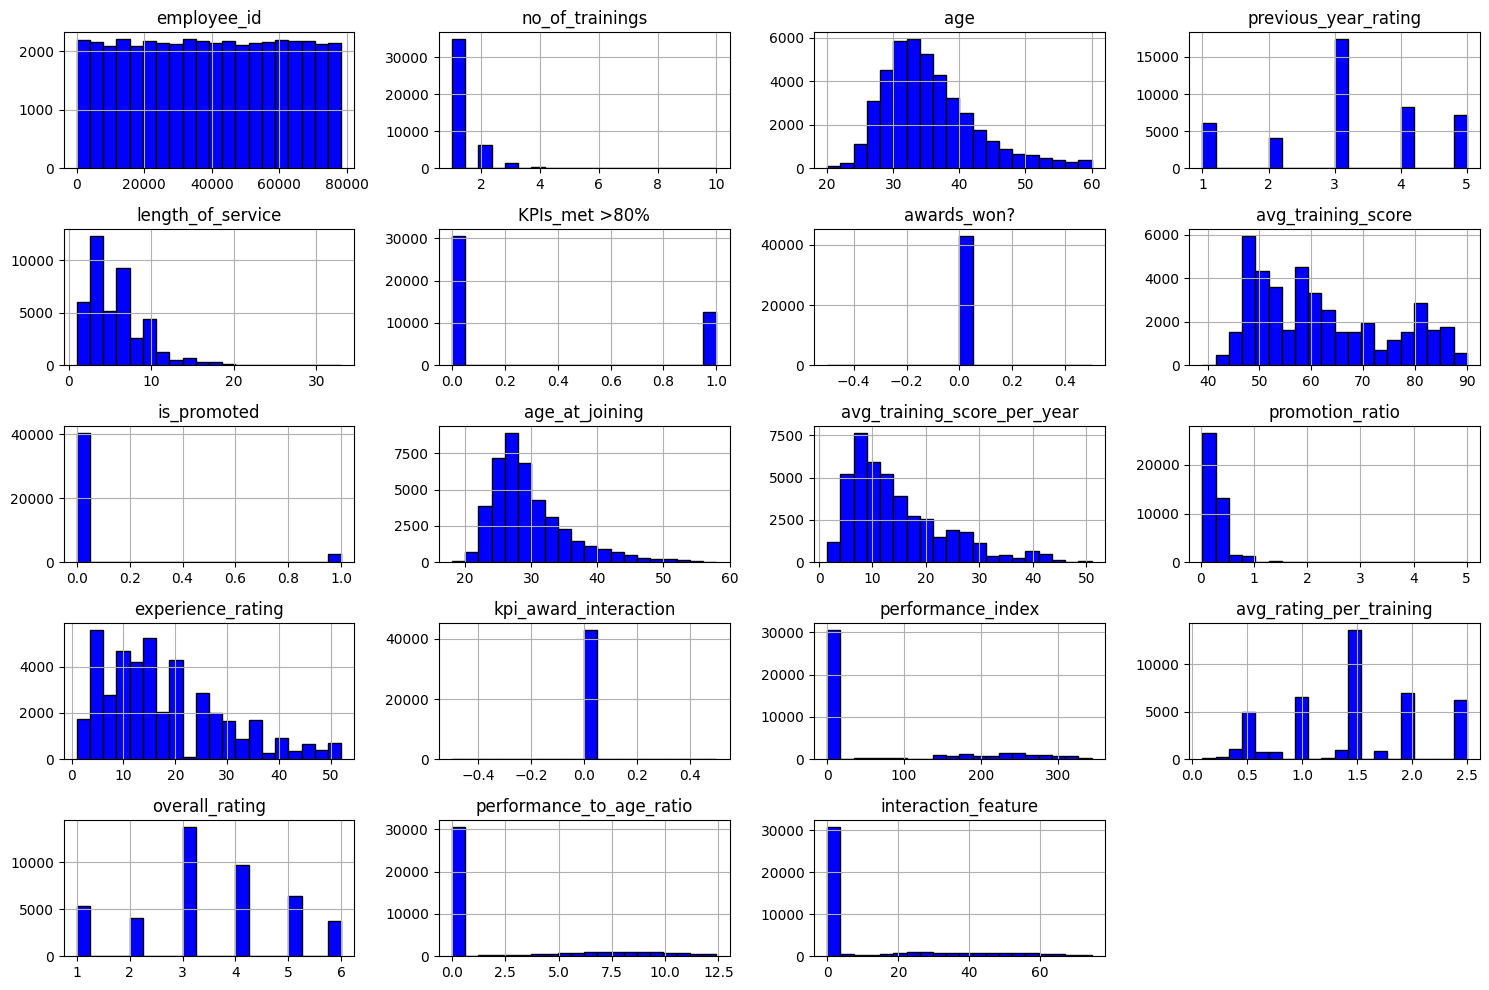

In [8]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(15, 10), color='blue', edgecolor='black')
plt.tight_layout()
plt.show()

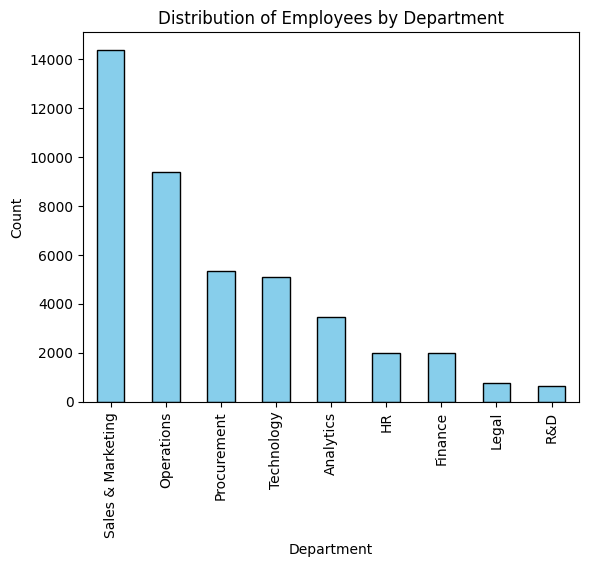

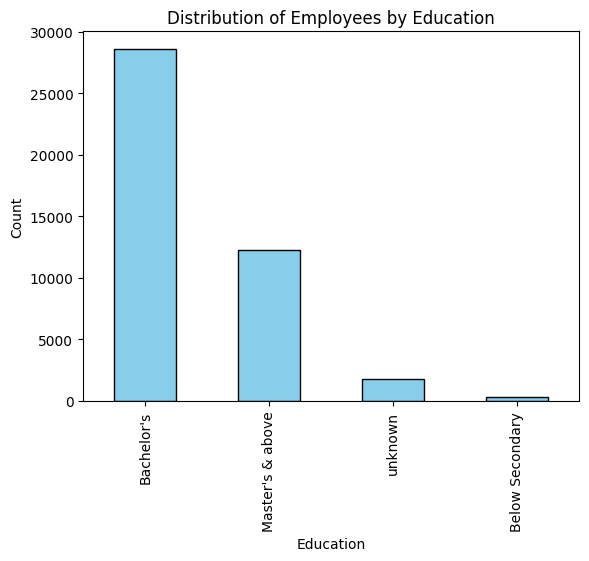

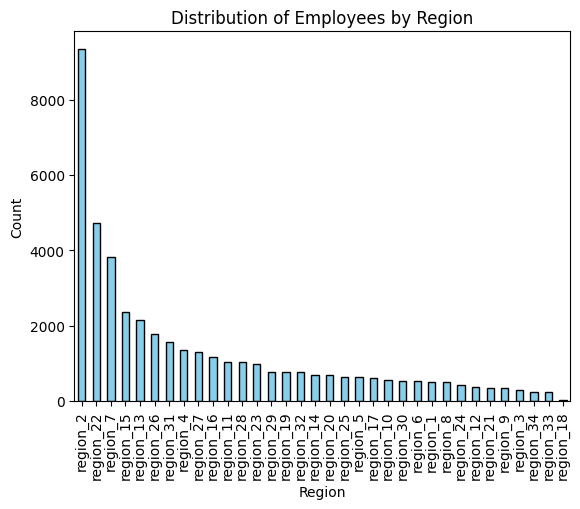

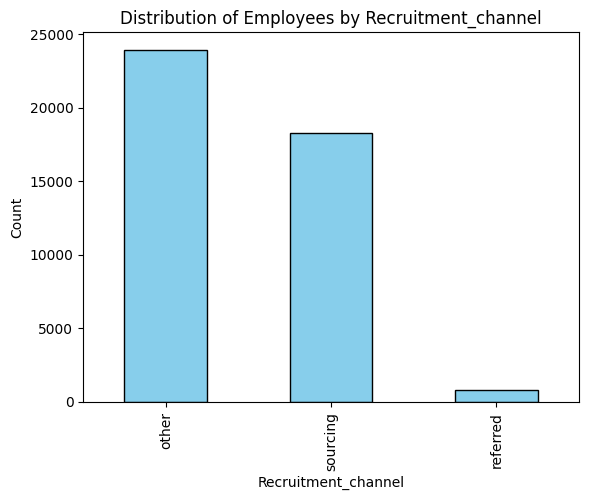

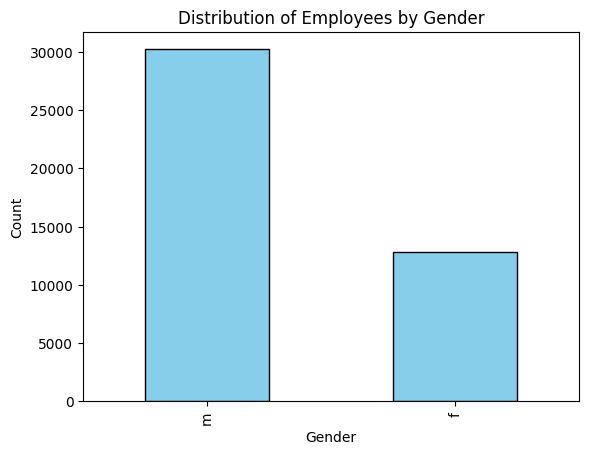

In [9]:
import matplotlib.pyplot as plt

categorical_columns = ['department', 'education', 'region', 'recruitment_channel','gender']

# Loop through categorical columns and create bar plots
for column in categorical_columns:
    category_counts = df[column].value_counts()
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.xlabel(column.capitalize())  # Set x-axis label based on column name
    plt.ylabel('Count')
    plt.title(f'Distribution of Employees by {column.capitalize()}')
    plt.show()


In [10]:
#convert cateogorical into numerical

# changing department region education recruitment channel to numerical by using sklearn and changing gender to numerical by using pandas

from sklearn.preprocessing import LabelEncoder
columns_to_label_encode = ['department', 'education', 'region', 'recruitment_channel','tenure_category','gender']
label_encoders = {col: LabelEncoder() for col in columns_to_label_encode}

def lablel_enco(data:pd.DataFrame, label:str = 'train'):
    if label == 'test':
        for col, encoder in label_encoders.items():
            data[col]=encoder.transform(data[col])
    else:
        for col, encoder in label_encoders.items():
            data[col]=encoder.fit_transform(data[col])

    return data

data=lablel_enco(df)
df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,avg_training_score_per_year,promotion_ratio,experience_rating,kpi_award_interaction,performance_index,tenure_category,avg_rating_per_training,overall_rating,performance_to_age_ratio,interaction_feature
0,65438,7,31,2,0,2,1,35,5.0,8,...,6.125000,0.125000,40.0,0,245.0,3,2.500000,6.0,9.074074,54.444444
1,65141,4,14,0,1,0,1,30,5.0,4,...,15.000000,0.250000,20.0,0,0.0,2,2.500000,5.0,0.000000,0.000000
2,7513,7,10,0,1,2,1,34,3.0,7,...,7.142857,0.142857,21.0,0,0.0,3,1.500000,3.0,0.000000,0.000000
3,2542,7,15,0,1,0,2,39,1.0,10,...,5.000000,0.200000,10.0,0,0.0,3,0.333333,1.0,0.000000,0.000000
4,48945,8,18,0,1,0,1,45,3.0,2,...,36.500000,0.500000,6.0,0,0.0,0,1.500000,3.0,0.000000,0.000000


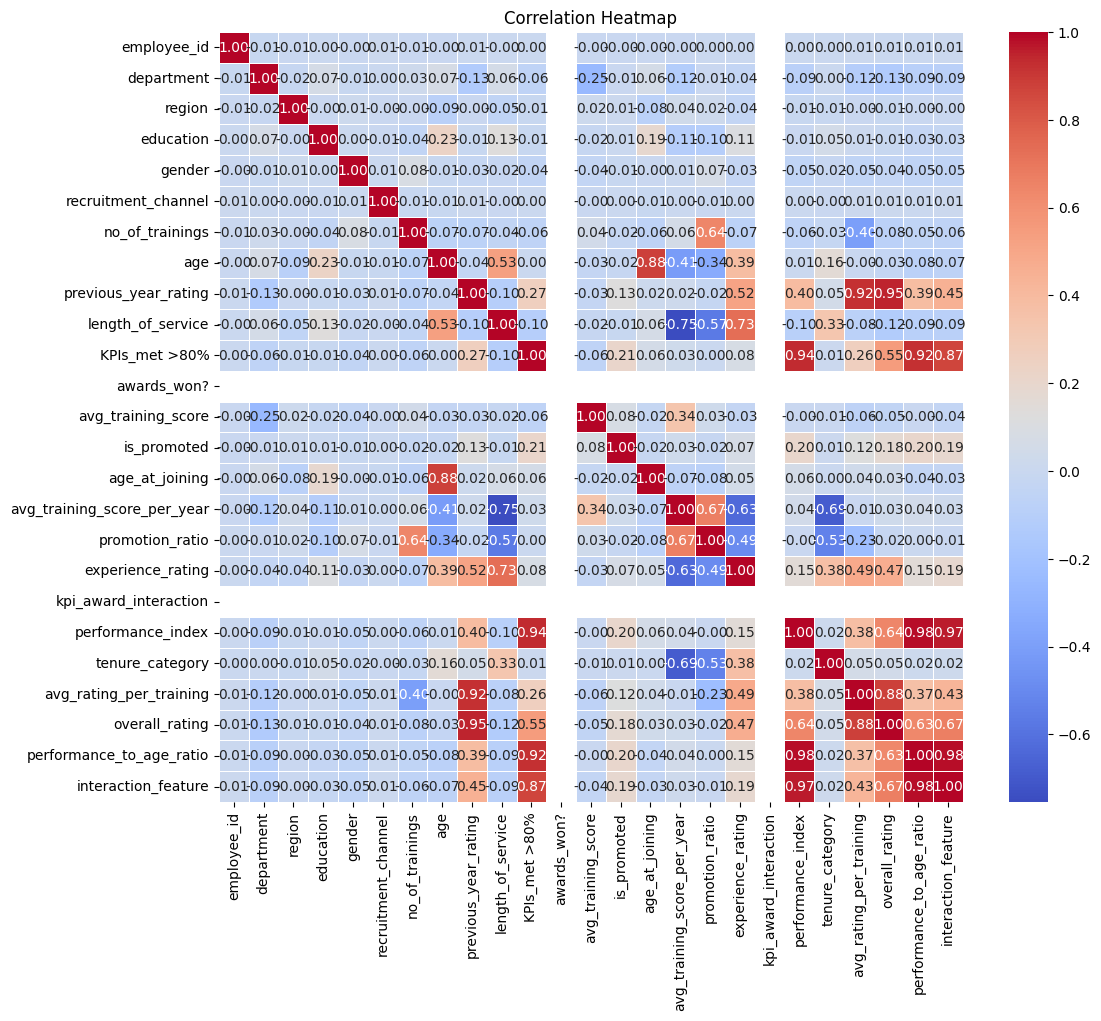

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


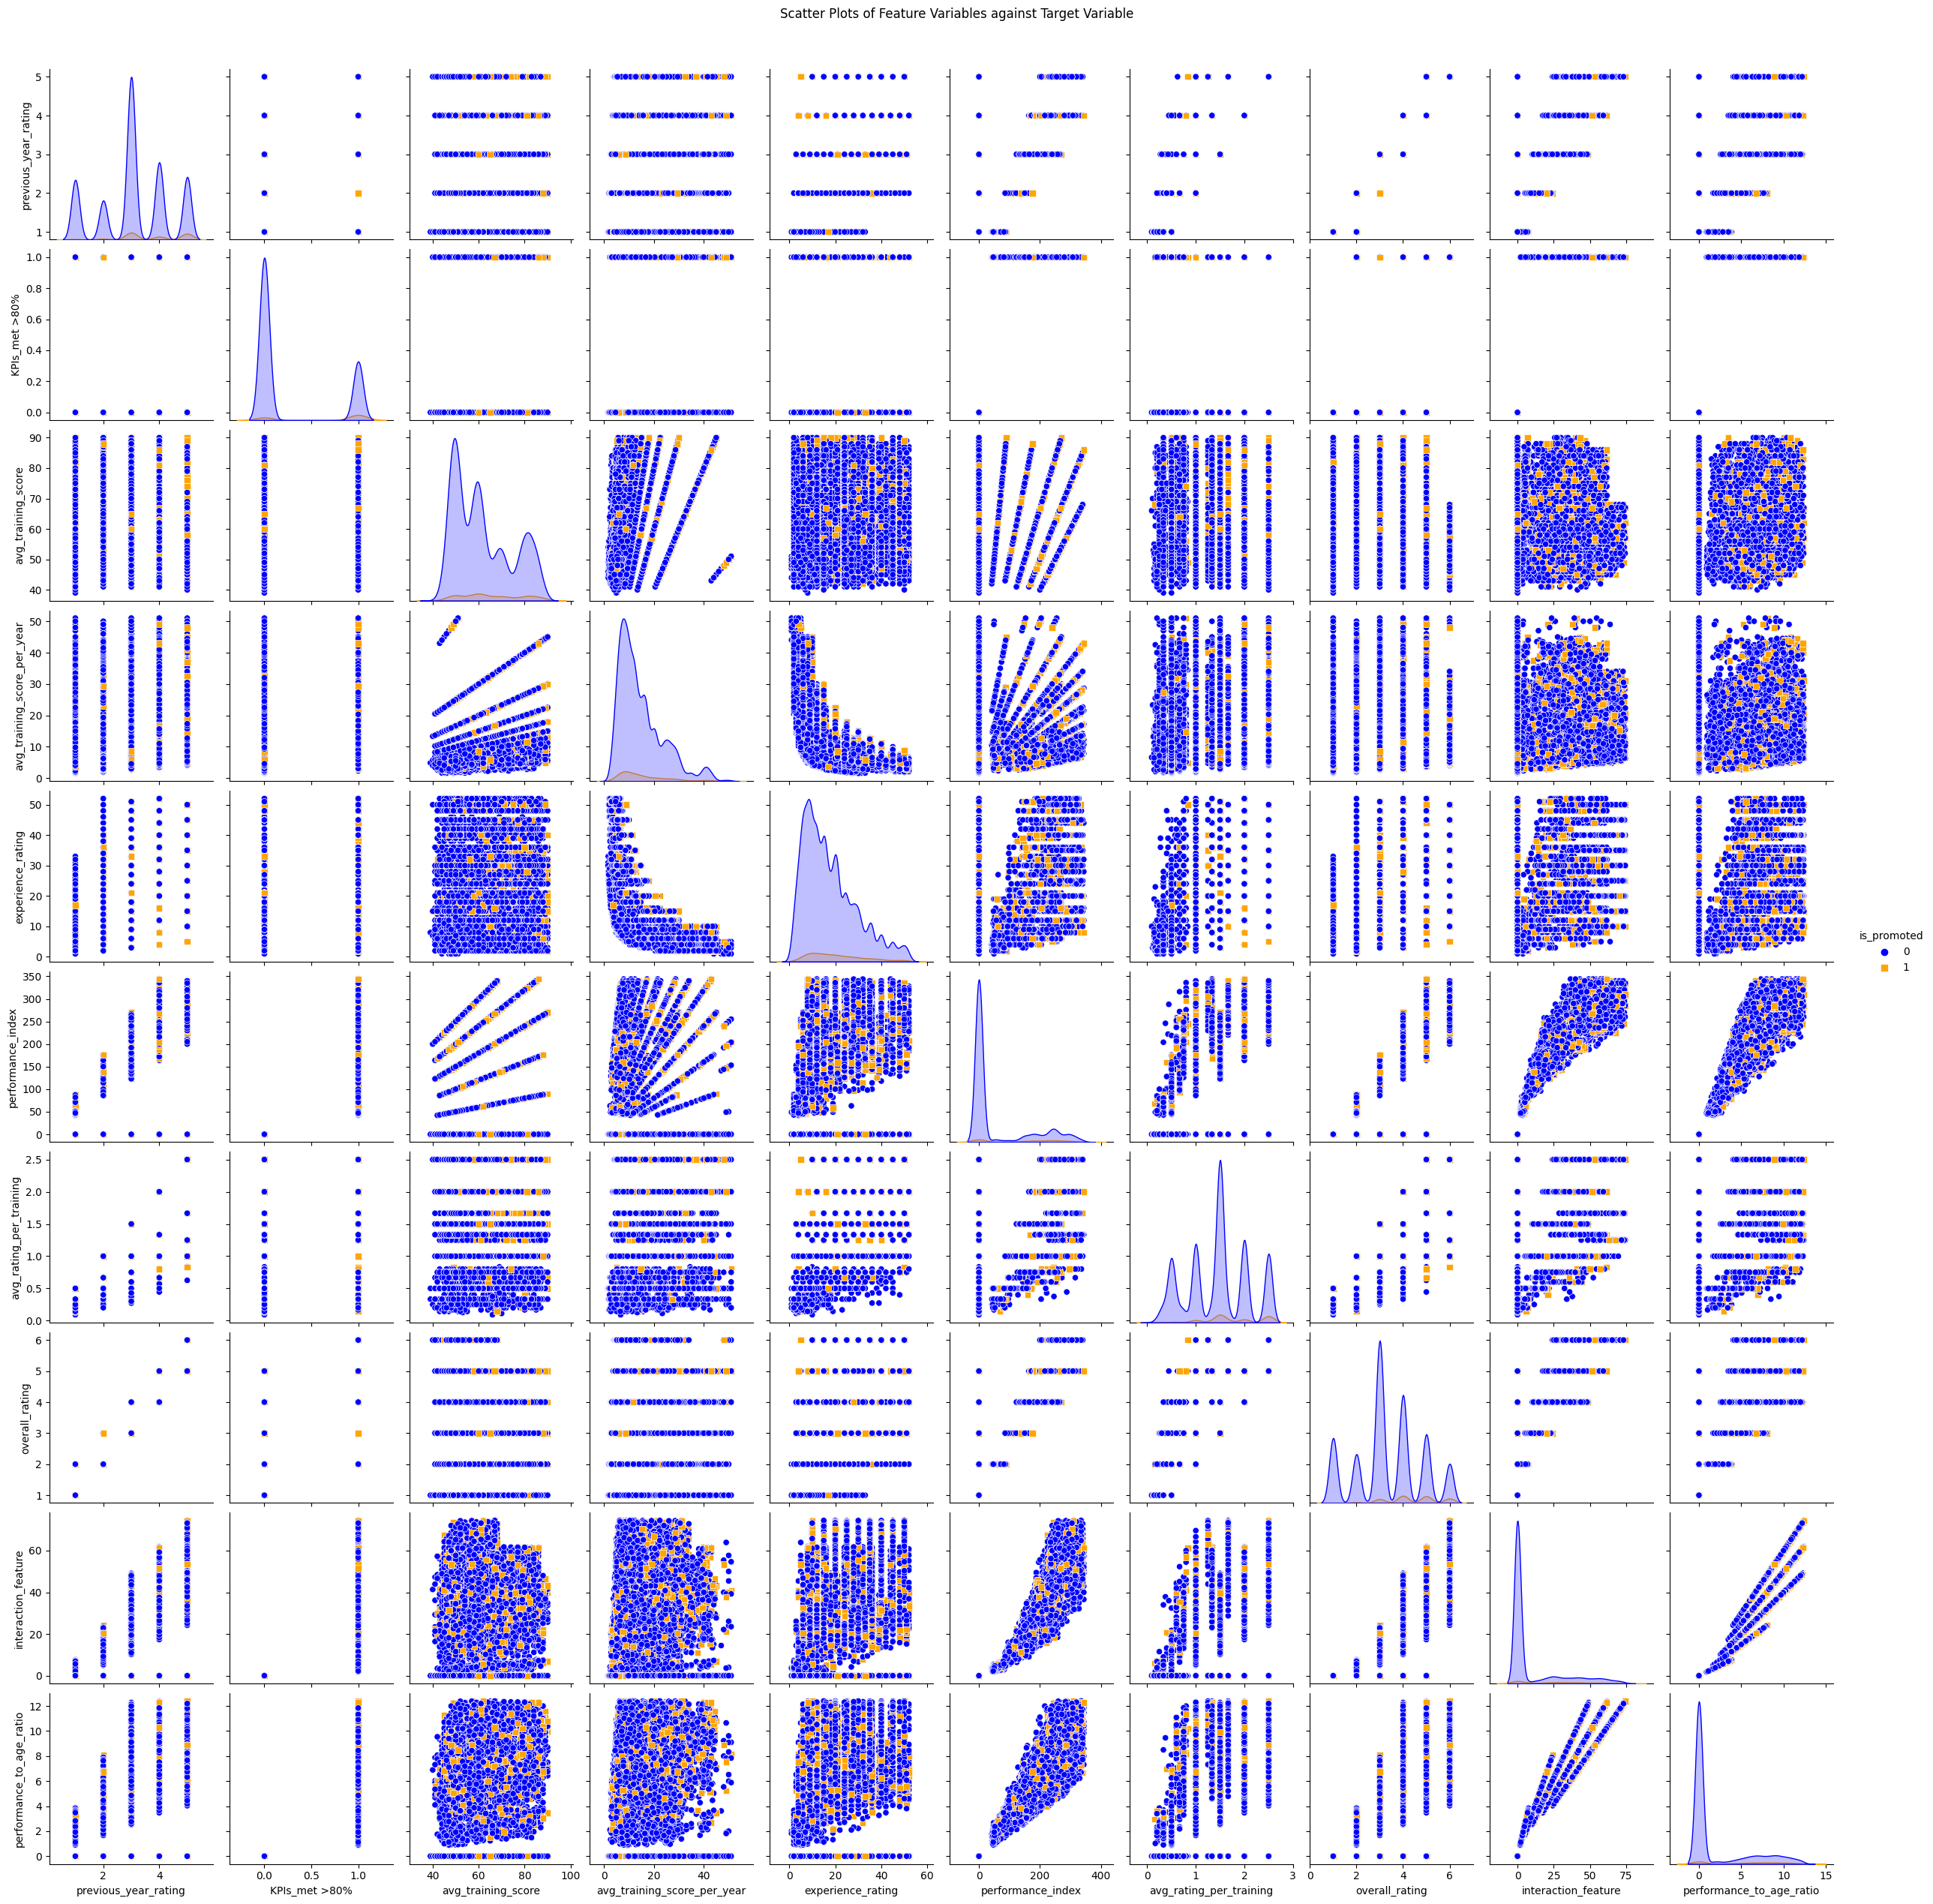

In [506]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant columns including the target variable 'is_promoted'
selected_columns = ['previous_year_rating', 'KPIs_met >80%', 'avg_training_score', 'avg_training_score_per_year', 'experience_rating', 'performance_index', 'avg_rating_per_training', 'overall_rating', 'interaction_feature', 'performance_to_age_ratio', 'is_promoted']

# Creating a DataFrame with selected columns
selected_df = df[selected_columns]

# Plotting scatter plots
sns.pairplot(selected_df, hue='is_promoted', markers=['o', 's'], palette={0: 'blue', 1: 'orange'})
plt.suptitle('Scatter Plots of Feature Variables against Target Variable', y=1.02)
plt.show()


In [12]:
#creating train data and test data by selecting features by seeing heatmap

from sklearn.model_selection import train_test_split

# Selecting specific columns
features = ['previous_year_rating', 'KPIs_met >80%', 'avg_training_score','avg_training_score_per_year','experience_rating','performance_index','avg_rating_per_training','overall_rating','interaction_feature' , 'performance_to_age_ratio']

# Creating the feature data and target variable
data = df[features]
target = df['is_promoted']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=45)





In [13]:
# Scaling the data with StandardScaler

from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
#applying SMOTE for oversampling

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [18]:
# - Use Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

#model selection

model=LogisticRegression()

model.fit(x_train_smote,y_train_smote)

#now prediction

predictions=model.predict(x_test)

#evaluation metrices

accuracy_scores=accuracy_score(y_test,predictions)
report=classification_report(y_test,predictions)
conf_matrix=confusion_matrix(y_test,predictions)

print("Accuracy:", accuracy_scores)
print("Classification Report:\n", report)
print("Confusion matrix:\n", conf_matrix)



Accuracy: 0.7061237129364404
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.70      0.82     12102
           1       0.15      0.79      0.25       815

    accuracy                           0.71     12917
   macro avg       0.57      0.74      0.54     12917
weighted avg       0.93      0.71      0.78     12917

Confusion matrix:
 [[8478 3624]
 [ 172  643]]


c:\Users\91914\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
#knn model 


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming x_train, x_test, y_train, y_test are your training and testing sets

# Standardize the features (important for KNN)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Choose the number of neighbors (k)
k = 3

# Initialize KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(x_test_scaled)

# Evaluation metrics
accuracy_knn = accuracy_score(y_test, knn_predictions)
report_knn = classification_report(y_test, knn_predictions)
conf_matrix_knn = confusion_matrix(y_test, knn_predictions)

# Print results
print("Accuracy (KNN):", accuracy_knn)
print("Classification Report (KNN):\n", report_knn)
print("Confusion matrix (KNN):\n", conf_matrix_knn)


Accuracy (KNN): 0.9252148331655957
Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     12102
           1       0.25      0.09      0.13       815

    accuracy                           0.93     12917
   macro avg       0.60      0.54      0.55     12917
weighted avg       0.90      0.93      0.91     12917

Confusion matrix (KNN):
 [[11876   226]
 [  740    75]]


In [20]:
#using svm


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming x_train, x_test, y_train, y_test are your training and testing sets

# Standardize the features (important for SVM)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Choose the SVM kernel and set parameters (you may need to tune these)
svm_kernel = 'rbf'  # You can also try 'linear', 'poly', 'sigmoid', etc.
C_value = 1.0  # Regularization parameter
gamma_value = 'scale'  # Kernel coefficient for 'rbf'

# Initialize SVM classifier
svm_model = SVC(kernel=svm_kernel, C=C_value, gamma=gamma_value)

# Train the model
svm_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(x_test_scaled)

# Evaluation metrics
accuracy_svm = accuracy_score(y_test, svm_predictions)
report_svm = classification_report(y_test, svm_predictions)
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)

# Print results
print("Accuracy (SVM):", accuracy_svm)
print("Classification Report (SVM):\n", report_svm)
print("Confusion matrix (SVM):\n", conf_matrix_svm)



Accuracy (SVM): 0.9369048540682821
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     12102
           1       0.00      0.00      0.00       815

    accuracy                           0.94     12917
   macro avg       0.47      0.50      0.48     12917
weighted avg       0.88      0.94      0.91     12917

Confusion matrix (SVM):
 [[12102     0]
 [  815     0]]


c:\Users\91914\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91914\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\91914\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [21]:
# using random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming x_train, x_test, y_train, y_test are your training and testing sets

# Standardize the features (if needed)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
random_forest_predictions = random_forest_model.predict(x_test_scaled)

# Evaluation metrics
accuracy_random_forest = accuracy_score(y_test, random_forest_predictions)
report_random_forest = classification_report(y_test, random_forest_predictions)
conf_matrix_random_forest = confusion_matrix(y_test, random_forest_predictions)

# Print results
print("Accuracy (Random Forest):", accuracy_random_forest)
print("Classification Report (Random Forest):\n", report_random_forest)
print("Confusion matrix (Random Forest):\n", conf_matrix_random_forest)


Accuracy (Random Forest): 0.9235890686691957
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     12102
           1       0.19      0.06      0.09       815

    accuracy                           0.92     12917
   macro avg       0.56      0.52      0.53     12917
weighted avg       0.89      0.92      0.91     12917

Confusion matrix (Random Forest):
 [[11879   223]
 [  764    51]]


In [25]:
#using xgboost 

import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming x_train, x_test, y_train, y_test are your training and testing sets

# Standardize the features (if needed)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize XGBoost classifier
xgb_model = XGBClassifier()
# Train the model
xgb_model.fit(x_train_scaled, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(x_test_scaled)

# Evaluation metrics
accuracy_xgb = accuracy_score(y_test, xgb_predictions)
report_xgb = classification_report(y_test, xgb_predictions)
conf_matrix_xgb = confusion_matrix(y_test, xgb_predictions)

# Print results
print("Accuracy (XGBoost):", accuracy_xgb)
print("Classification Report (XGBoost):\n", report_xgb)
print("Confusion matrix (XGBoost):\n", conf_matrix_xgb)


Accuracy (XGBoost): 0.9341178292173106
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     12102
           1       0.32      0.04      0.07       815

    accuracy                           0.93     12917
   macro avg       0.63      0.52      0.52     12917
weighted avg       0.90      0.93      0.91     12917

Confusion matrix (XGBoost):
 [[12035    67]
 [  784    31]]


In [15]:
#USING CATBOOST MODEL

import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming your data is stored in a DataFrame named 'df'
# Replace 'is_promoted' with the name of your target variable column

# Separate features and target variable
data = df.drop('is_promoted', axis=1)
target = df['is_promoted']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
data_train_resampled, target_train_resampled = smote.fit_resample(data_train, target_train)

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier()

# Train the model on the resampled data
catboost_model.fit(data_train_resampled, target_train_resampled)

# Make predictions on the test set
target_pred = catboost_model.predict(data_test)

# Evaluate the model
accuracy = accuracy_score(target_test, target_pred)
report = classification_report(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)

# Print the results
print("\nAccuracy after oversampling:", accuracy)
print("Classification Report after oversampling:\n", report)
print("Confusion matrix after oversampling:\n", conf_matrix)

# If you want to get feature importances from CatBoost
feature_importances_catboost = catboost_model.feature_importances_

# Ensure lengths match before creating the DataFrame
if len(data.columns) == len(feature_importances_catboost):
    # Create a DataFrame to display feature importance
    feature_importance_df_catboost = pd.DataFrame({'Feature': data.columns, 'Importance': feature_importances_catboost})
    feature_importance_df_catboost = feature_importance_df_catboost.sort_values(by='Importance', ascending=False)

    # Display the top features
    print("\nTop Features from the CatBoost model:")
    print(feature_importance_df_catboost.head(10))
else:
    print("Error: Length mismatch between data columns and feature importances.")


Learning rate set to 0.061086
0:	learn: 0.6587159	total: 166ms	remaining: 2m 46s
1:	learn: 0.6121112	total: 181ms	remaining: 1m 30s
2:	learn: 0.5797521	total: 196ms	remaining: 1m 4s
3:	learn: 0.5602391	total: 208ms	remaining: 51.8s
4:	learn: 0.5358677	total: 221ms	remaining: 43.9s
5:	learn: 0.5195893	total: 235ms	remaining: 38.9s
6:	learn: 0.5048499	total: 248ms	remaining: 35.2s
7:	learn: 0.4900801	total: 260ms	remaining: 32.2s
8:	learn: 0.4686442	total: 272ms	remaining: 29.9s
9:	learn: 0.4559324	total: 283ms	remaining: 28s
10:	learn: 0.4409947	total: 295ms	remaining: 26.5s
11:	learn: 0.4329525	total: 306ms	remaining: 25.2s
12:	learn: 0.4207968	total: 317ms	remaining: 24.1s
13:	learn: 0.4150901	total: 328ms	remaining: 23.1s
14:	learn: 0.4100287	total: 339ms	remaining: 22.3s
15:	learn: 0.4027566	total: 351ms	remaining: 21.6s
16:	learn: 0.3998111	total: 362ms	remaining: 20.9s
17:	learn: 0.3954988	total: 373ms	remaining: 20.3s
18:	learn: 0.3858224	total: 384ms	remaining: 19.8s
19:	learn: 

In [496]:
#USING LGBM MODEL

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming your data is stored in a DataFrame named 'df'
# Replace 'is_promoted' with the name of your target variable column

# Separate features and target variable
data = df.drop('is_promoted', axis=1)
target = df['is_promoted']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
data_train_resampled, target_train_resampled = smote.fit_resample(data_train, target_train)

# Initialize LightGBM classifier
lgbm_model = LGBMClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(data_train_resampled, target_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model on the resampled data with the best hyperparameters
lgbm_model_best = LGBMClassifier(**best_params)
lgbm_model_best.fit(data_train_resampled, target_train_resampled)

# Make predictions on the test set
target_pred = lgbm_model_best.predict(data_test)

# Evaluate the model
accuracy = accuracy_score(target_test, target_pred)
report = classification_report(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)

# Print the results
print("\nBest Hyperparameters:", best_params)
print("Accuracy after oversampling and hyperparameter tuning:", accuracy)
print("Classification Report after oversampling and hyperparameter tuning:\n", report)
print("Confusion matrix after oversampling and hyperparameter tuning:\n", conf_matrix)

# If you want to get feature importances from LightGBM
feature_importances_lgbm = lgbm_model_best.feature_importances_

# Ensure lengths match before creating the DataFrame
if len(data.columns) == len(feature_importances_lgbm):
    # Create a DataFrame to display feature importance
    feature_importance_df_lgbm = pd.DataFrame({'Feature': data.columns, 'Importance': feature_importances_lgbm})
    feature_importance_df_lgbm = feature_importance_df_lgbm.sort_values(by='Importance', ascending=False)

    # Display the top features
    print("\nTop Features from the LightGBM model:")
    print(feature_importance_df_lgbm.head(10))
else:
    print("Error: Length mismatch between data columns and feature importances.")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 32307, number of negative: 32307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5388
[LightGBM] [Info] Number of data points in the train set: 64614, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 323

In [497]:
#decisiontree classifier


import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming your data is stored in a DataFrame named 'df'
# Replace 'is_promoted' with the name of your target variable column

# Separate features and target variable
data = df.drop('is_promoted', axis=1)
target = df['is_promoted']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
data_train_resampled, target_train_resampled = smote.fit_resample(data_train, target_train)

# Initialize Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
grid_search.fit(data_train_resampled, target_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model on the resampled data with the best hyperparameters
dt_model_best = DecisionTreeClassifier(**best_params)
dt_model_best.fit(data_train_resampled, target_train_resampled)

# Make predictions on the test set
target_pred = dt_model_best.predict(data_test)

# Evaluate the model
accuracy = accuracy_score(target_test, target_pred)
report = classification_report(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)

# Print the results
print("\nBest Hyperparameters:", best_params)
print("Accuracy after oversampling and hyperparameter tuning:", accuracy)
print("Classification Report after oversampling and hyperparameter tuning:\n", report)
print("Confusion matrix after oversampling and hyperparameter tuning:\n", conf_matrix)

# If you want to get feature importances from Decision Tree
feature_importances_dt = dt_model_best.feature_importances_

# Ensure lengths match before creating the DataFrame
if len(data.columns) == len(feature_importances_dt):
    # Create a DataFrame to display feature importance
    feature_importance_df_dt = pd.DataFrame({'Feature': data.columns, 'Importance': feature_importances_dt})
    feature_importance_df_dt = feature_importance_df_dt.sort_values(by='Importance', ascending=False)

    # Display the top features
    print("\nTop Features from the Decision Tree model:")
    print(feature_importance_df_dt.head(10))
else:
    print("Error: Length mismatch between data columns and feature importances.")



Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy after oversampling and hyperparameter tuning: 0.9141895030190432
Classification Report after oversampling and hyperparameter tuning:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      8100
           1       0.32      0.40      0.36       512

    accuracy                           0.91      8612
   macro avg       0.64      0.68      0.66      8612
weighted avg       0.92      0.91      0.92      8612

Confusion matrix after oversampling and hyperparameter tuning:
 [[7666  434]
 [ 305  207]]

Top Features from the Decision Tree model:
                 Feature  Importance
12    avg_training_score    0.208586
1             department    0.200084
21        overall_rating    0.166882
2                 region    0.071071
18     performance_index    0.048251
0            employee_id    0.040942
13        age_at_joini

In [16]:
# USING XGBOOST MODEL AND APPLYING Recursive Feature Elimination (RFE)

import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming your data is stored in a DataFrame named 'df'
# Replace 'is_promoted' with the name of your target variable column

# Separate features and target variable
data = df.drop('is_promoted', axis=1)
target = df['is_promoted']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(data_scaled, target, test_size=0.2, random_state=42)

# Apply Recursive Feature Elimination (RFE) for feature selection
# Set the estimator (model) and the number of features to select
estimator = XGBClassifier()
num_features_to_select = 15  # Adjust as needed
rfe_selector = RFE(estimator, n_features_to_select=num_features_to_select)
data_train_selected = rfe_selector.fit_transform(data_train, target_train)
data_test_selected = rfe_selector.transform(data_test)

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
data_train_resampled, target_train_resampled = smote.fit_resample(data_train_selected, target_train)

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Train the model on the resampled data
xgb_model.fit(data_train_resampled, target_train_resampled)

# Make predictions on the test set
target_pred = xgb_model.predict(data_test_selected)

# Evaluate the model
accuracy = accuracy_score(target_test, target_pred)
report = classification_report(target_test, target_pred)
conf_matrix = confusion_matrix(target_test, target_pred)

# Print the results
print("\nAccuracy after feature selection and oversampling:", accuracy)
print("Classification Report after feature selection and oversampling:\n", report)
print("Confusion matrix after feature selection and oversampling:\n", conf_matrix)




Accuracy after feature selection and oversampling: 0.9520436600092894
Classification Report after feature selection and oversampling:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      8100
           1       0.73      0.31      0.44       512

    accuracy                           0.95      8612
   macro avg       0.84      0.65      0.70      8612
weighted avg       0.94      0.95      0.94      8612

Confusion matrix after feature selection and oversampling:
 [[8040   60]
 [ 353  159]]


In [ ]:
### NOW MODEL MADE NOW USING THAT MODEL TO CHECK FOR TEST DATA SET.CSV WHICH IS A NEW DATA .
### WE NEED TO CHECK FOR IT BY DOING SOME FEATURE ENGINNERING AS DONE IN TRAIN SET,SCALING AND ENCODING AND THEN WE CAN TEST IT.


import pandas as pd

dfsd=pd.read_csv("test_Data_hr_anylytics.csv")
dfdss=dfsd.copy()
dfdss = missing_imputa(dfdss)

In [483]:
# Feature Engineering

# Create a new feature: Fresher or Experienced based on Previous Year Rating
#dfdss['fresher_or_experienced'] = dfdss['previous_year_rating'].apply(lambda x: 'Fresher' if x == 0.0 else 'Experienced')


dfdss=feature_eng(dfdss)

In [484]:
dfdss.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,avg_training_score_per_year,promotion_ratio,experience_rating,kpi_award_interaction,performance_index,tenure_category,avg_rating_per_training,overall_rating,performance_to_age_ratio,interaction_feature
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,0.0,1,...,77.000000,1.000000,0.0,0,385.0,0-2,0.0,1.0,16.73913,16.73913
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,...,10.200000,0.200000,15.0,0,0.0,2-5,1.5,3.0,0.00000,0.00000
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,...,11.750000,0.250000,4.0,0,0.0,2-5,0.5,1.0,0.00000,0.00000
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,...,7.222222,0.333333,18.0,0,0.0,5-10,0.5,2.0,0.00000,0.00000
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,...,8.714286,0.142857,28.0,0,0.0,5-10,2.0,4.0,0.00000,0.00000


In [485]:
dfdss=lablel_enco(dfdss, label='test')

In [487]:

datascaled = scaler.transform(dfdss)
test_Data = rfe_selector.transform(datascaled)

y = xgb_model.predict(test_Data)

In [488]:
dfdss['is_promoted'] = y

In [489]:
dfdss[['employee_id','is_promoted']].to_csv('submit.csv',index=False)

In [490]:
dfdss.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,promotion_ratio,experience_rating,kpi_award_interaction,performance_index,tenure_category,avg_rating_per_training,overall_rating,performance_to_age_ratio,interaction_feature,is_promoted
0,8724,8,18,0,1,2,1,24,0.0,1,...,1.000000,0.0,0,385.0,0,0.0,1.0,16.73913,16.73913,0
1,74430,2,28,0,0,0,1,31,3.0,5,...,0.200000,15.0,0,0.0,2,1.5,3.0,0.00000,0.00000,0
2,72255,7,4,0,1,0,1,31,1.0,4,...,0.250000,4.0,0,0.0,2,0.5,1.0,0.00000,0.00000,0
3,38562,5,11,0,0,0,3,31,2.0,9,...,0.333333,18.0,0,0.0,3,0.5,2.0,0.00000,0.00000,0
4,64486,1,21,0,1,2,1,30,4.0,7,...,0.142857,28.0,0,0.0,3,2.0,4.0,0.00000,0.00000,0
